# PDE3 Workshop 2 
## Bonus Questions

This notebook contains the solutions to the bonus questions of the second workshop of the PDE3 course. Attempt these questions only after you have solved the main questions of the workshop.

In [2]:
# Run this cell to import the required modules.
import numpy as np
import matplotlib.pyplot as plt
from auxillary import Jacobi_iteration_vs_error, SOR_iteration_vs_error, calc_Q, Grid, SOR

%matplotlib inline  

In the last question of the main workshop, we solved the Laplace equation subject to the following boundary conditions:

* $v(0, y) = 0, \quad y\ge0$
* $v(1, y) = 0, \quad y\ge0$
* $v(x, y\to\infty) \to 0, \quad 0\le x\le1$
* $v(x, 0) = \sin^5(\pi x), \quad 0\le x\le1$

### a)
Use the method of separation of variables to solve the Laplace equation subject to the boundary conditions in Section 2.

You might want to use the identity
$$
\sin^5\theta = \frac{1}{16}\left(\sin 5\theta - 5 \sin 3\theta + 10 \sin\theta \right)
$$

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:

We have 

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0
$$
Subject to:
1. $u(0, y) = 0, \quad y\ge0$
2. $u(1, y) = 0, \quad y\ge0$
3. $u(x, y\to\infty) \to 0, \quad 0\le x\le1$
4. $u(x, 0) = \sin^5(\pi x), \quad 0\le x\le1$

We want separable solutions so are looking for solutions of the form $u(x,y) = X(x)Y(y)$

So we have:

$\frac{X''}{X} -\frac{Y''}{Y} = \lambda^2$

Boundary conditions 1 and 2 imply

$$
X(x) = A\sin(\lambda x) + B\cos(\lambda x)
$$

and bounday conditions 3 and 4 imply

$$
Y(y) = Ce^{-\lambda y} + De^{\lambda y}
$$

which gives

$$
u(x,y) = X(x)Y(y) = (A\sin(\lambda x) + B\cos(\lambda x))(Ce^{-\lambda y} + De^{\lambda y}).
$$

Now, we need to find the constants.


Looking again at BCs 1 and 2:

We need $U(0,y) = 0$ and $U(1,y) = 0$ so we need

$$
X(x) = A_n \sin(n\pi x)
$$

where $n$ is an integer.
Hence, $\lambda = n\pi$ and $B = 0$.

Now looking at BC 3:

$U(x, y\to\infty) \to 0 \implies D = 0$.

This gives us a solution of the form:

$$
u_n(x,y) = A_n \sin(n\pi x)C_n e^{-n\pi y}
$$
Defining $\alpha_n = A_nC_n$ we have a series of super-imposed solutions:

$$
u(x,y) = \sum_{n=0}^\infty \alpha_n \sin(n\pi x)e^{-n\pi y}
$$

We can use BC 4 to work out which of these solutions are present in the final solution.

We have
$$
u(x,0) = \sin^5(\pi x) = \frac{1}{16}\left[ \sin(5\pi x) - 5 \sin(3\pi x) + 10 sin(\pi x)\right] =\sum_{n=0}^\infty \alpha_n \sin(n\pi x)
$$
So we only want $n=1, n=3, n=5$ in the final solution.

Hence, the final solution is:

$$
u(x,y) = \frac{1}{16}\left(e^{-5\pi y}\sin 5 \pi x  - 5 e^{-3\pi y}\sin 3\pi x +e^{-\pi y} 10 \sin\pi x \right)
$$

</font>

### b)
Implement the analytic solution you have found in Python and compare the result with the numerical solution from Section 2b for the main Jupyter notebook for Workshop 2.


State why using $y=3$ was a suitable cutoff for the grid in Section 2b.

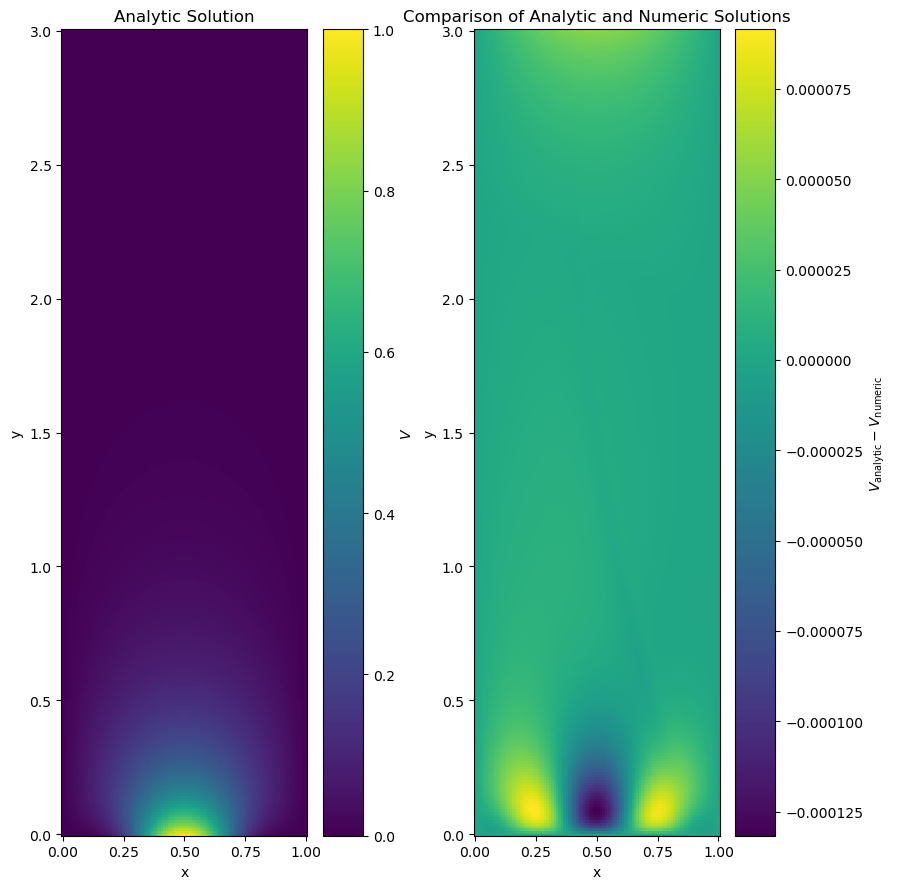

In [7]:
# Your code here.

### BEGIN SOLUTION ###

SOR_mesh = Grid(101,301)
SOR_mesh.set_extent(1., 3.)
SOR_mesh.generate()
SOR_mesh.u[0,:] = 0
SOR_mesh.u[-1,:] = 0
SOR_mesh.u[:,0] = np.sin(np.pi*SOR_mesh.x[:,0])**5
SOR_mesh.u[:,-1] = 0

iter, err = SOR(SOR_mesh, 10000, 1e-6)

def analytic(x,y):
    return 1/16*(np.exp(-5*np.pi*y)*np.sin(5*np.pi*x)-5*np.exp(-3*np.pi*y)*np.sin(3*np.pi*x)+10*np.exp(-np.pi*y)*np.sin(np.pi*x))

fig, ax = plt.subplots(1, 2, figsize=(9, 9))

c1 = ax[0].pcolor(SOR_mesh.x, SOR_mesh.y, analytic(SOR_mesh.x, SOR_mesh.y))
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title("Analytic Solution")
fig.colorbar(c1, ax=ax[0], label='$V$')

c2 = ax[1].pcolor(SOR_mesh.x, SOR_mesh.y, analytic(SOR_mesh.x, SOR_mesh.y) - SOR_mesh.u)
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title("Comparison of Analytic and Numeric Solutions")
fig.colorbar(c2, ax=ax[1], label=r'$V_\text{analytic}-V_\text{numeric}$')

plt.tight_layout()
plt.show()


analytic_at_2 = analytic(SOR_mesh.x, 2.)
analytic_at_3 = analytic(SOR_mesh.x, 3.)

### END SOLUTION ###

<font color='orange'>Your answer goes here. Double-click the cell to modify it.</font>

<font color='red'>

### Solution:

A cutoff of $y=3$ was suitable because the exponential term $e^{-n\pi y}$ will decay rapidly towards 0. The maximum value at $y=3$ is $5.04\times10^{-5} \approx 0$. For comparison, at $y=2$ the maximum value is $0.00117$ and at $y=4$ the maximum value is $2.18\times10^{-6}$. Therefore, a cutoff of $y=3$ is a good balance between accuracy and computational efficiency.

</font>

### c)
Produce a plot to show how the error between the numerical (using both Jacobi and SOR schemes) and analytic solutions varies with increasing number of iterations. Comment on how quickly the two schemes converge. 

The error can be calculated as:

$$
\varepsilon = \frac{Q_\text{analytic} - Q_\text{numerical}}{Q_\text{analytic}}
$$

where $Q_i$ is defined as 
$$
Q_i = \int_0^1\int_0^{y_\text{max}} u(x,y)^2 \, dx \, dy
$$

To assist with this question, modified versions of the Jacobi and SOR functions above have been provided in ``auxillary.py`` and have been imported above. 
These functions take in the computational mesh (`Grid` object) and the list of iteration steps to be sampled. They output the corresponding iterations and the values of $Q$ for those iterations. An implementation of the $Q$ integral is also provided. 

In [10]:
# The code below sets up the mesh and runs the calculations for Jacobi and SOR schemes

mesh_size = (101,301)
mesh_extent = (1., 3.)

iteration_steps = [2**i for i in range(0,11)]

def setup_mesh(mesh_size: tuple[int,int], mesh_extent: tuple[float,float]) -> Grid:
    mesh = Grid(*mesh_size)
    mesh.set_extent(*mesh_extent)
    mesh.generate()
    mesh.u[0,:] = 0
    mesh.u[-1,:] = 0
    mesh.u[:,0] = np.sin(np.pi*mesh.x[:,0])**5
    mesh.u[:,-1] = 0
    return mesh


mesh_Jacobi = setup_mesh(mesh_size, mesh_extent)
iterations_Jacobi, Qs_Jacobi = Jacobi_iteration_vs_error(mesh=mesh_Jacobi, iterations_to_sample=iteration_steps)

mesh_SOR = setup_mesh(mesh_size, mesh_extent)
iterations_SOR, Qs_SOR = SOR_iteration_vs_error(mesh=mesh_SOR, iterations_to_sample=iteration_steps)

mesh_analytic = setup_mesh(mesh_size, mesh_extent)
mesh_analytic.u = analytic(mesh_analytic.x, mesh_analytic.y)
Q_analytic = calc_Q(mesh_analytic)


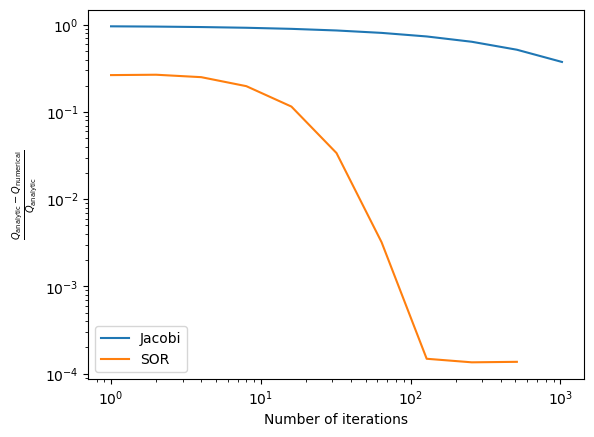

In [11]:
# Your code here

### BEGIN SOLUTION ###

# plt.plot(iterations_Jacobi, Qs_Jacobi)
plt.plot(iterations_Jacobi, np.abs((Q_analytic - Qs_Jacobi)/Q_analytic), label='Jacobi')

# plt.plot(iterations_SOR, Qs_SOR)
plt.plot(iterations_SOR, np.abs((Q_analytic - Qs_SOR)/Q_analytic), label='SOR')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\frac{Q_{\mathrm{analytic}} - Q_{\mathrm{numerical}}}{Q_{\mathrm{analytic}}}$')
plt.legend()

plt.show()

### END SOLUTION ###